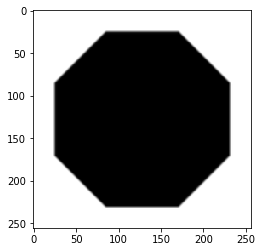

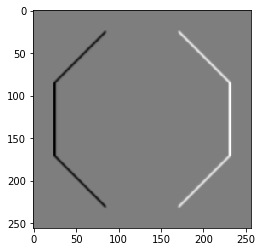

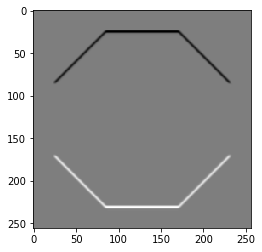

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np


def normalize(img_in):
    img_out = np.zeros(img_in.shape)
    cv2.normalize(img_in, img_out, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return img_out


# Gradient Direction
def select_gdir(gmag, gdir, mag_min, angle_low, angle_high):
    # TODO: Find and return pixels that fall within the desired mag, angle range
    result = gmag >= mag_min
    result &= gdir >= angle_low
    result &= gdir <= angle_high
    return result.astype(np.float)  # Converts bool array to float [0., 1.]

# Load and convert image to double type, range [0, 1] for convenience
img = cv2.imread('images/octagon.png', 0) / 255.
plt.imshow(img, cmap='gray')
# plt.imshow(img)
plt.show()

# Compute x, y gradients
gx = cv2.Sobel(img, -1, dx=1, dy=0)
gy = cv2.Sobel(img, -1, dx=0, dy=1)
plt.imshow(gx, cmap='gray')
plt.show()
plt.imshow(gy, cmap='gray')
plt.show()

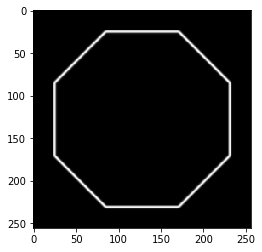

In [55]:
gmag = np.sqrt(gx**2 + gy**2)

# The minus sign here is used based on how imgradient is implemented in octave
# See https://sourceforge.net/p/octave/image/ci/default/tree/inst/imgradient.m#l61
gdir = np.arctan2(-gy, gx) * 180 / np.pi
plt.imshow(gmag / (4 * np.sqrt(2)), cmap='gray')
plt.show()
# plt.imshow(normalize(gmag).astype(np.uint8), cmap='gray')
# plt.show()
# plt.imshow(normalize(gdir).astype(np.uint8), cmap='gray')

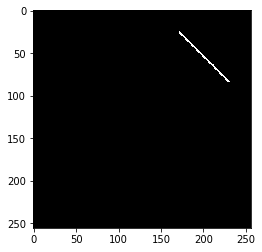

In [54]:
# Find pixels with desired gradient direction
my_grad = select_gdir(gmag, gdir, 1, 30, 60)
plt.imshow(my_grad, cmap='gray')